In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, classification_report, accuracy_score

import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, LSTM, Embedding, SpatialDropout1D, Dropout

import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('weatherAUS.csv')

In [ ]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [ ]:
df.shape

(145460, 23)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

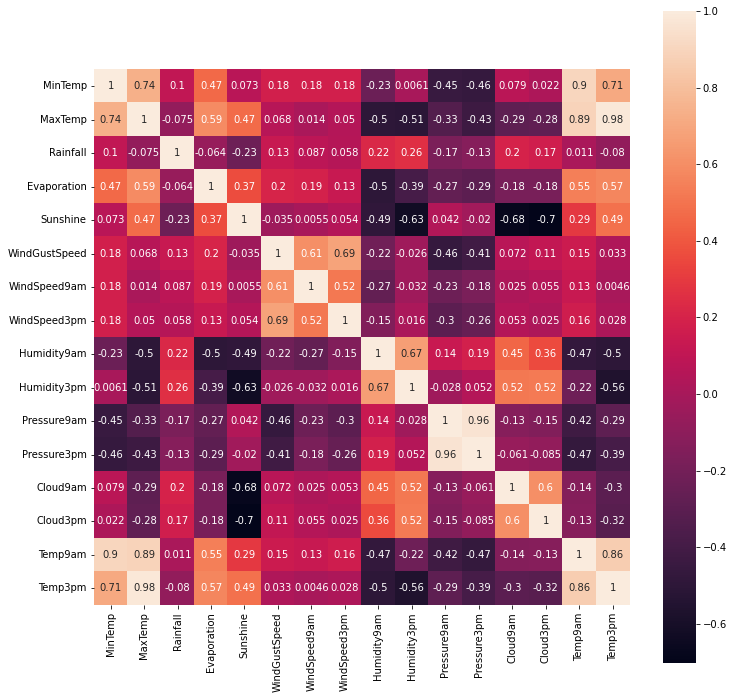

In [ ]:
import seaborn as sns
corrmat = df.corr()
cmap = sns.color_palette("rocket",as_cmap=True)
plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap=cmap,annot=True,square=True)

In [ ]:
def Date_process(dataframe):
  dataframe['Date'] = pd.to_datetime(dataframe['Date'])
  dataframe['Year'] = dataframe['Date'].dt.year
  dataframe['Month'] = dataframe['Date'].dt.month
  dataframe['Day'] = dataframe['Date'].dt.day
  dataframe.drop(['Date'], axis=1, inplace=True)
  dataframe['RISK_MM'] = dataframe.Rainfall.shift(-1)

  return dataframe

def Rain_process(dataframe):

  dataframe['RainToday'].replace({'No' : 0, 'Yes' : 1}, inplace=True)
  dataframe['RainTomorrow'].replace({'No' : 0, 'Yes' : 1}, inplace=True)

  return dataframe

In [ ]:
def model_1(dataframe):
  fake_df = Date_process(dataframe.copy())
  fake_df = Rain_process(fake_df)

  X=fake_df

  numerical_cols = [col for col in X.columns if X[col].dtypes == "float64"]

  categorical_cols = [col for col in X.columns if X[col].dtypes == 'object']

  for col in numerical_cols:
    col_median = X[col].median()
    X[col].fillna(col_median, inplace=True)

  X['WindGustDir'].fillna(X['WindGustDir'].mode()[0], inplace=True)
  X['WindDir9am'].fillna(X['WindDir9am'].mode()[0], inplace=True)
  X['WindDir3pm'].fillna(X['WindDir3pm'].mode()[0], inplace=True)

  X = pd.get_dummies(X, columns = categorical_cols)
  X = X.dropna()

  target = X['RainTomorrow'].copy()
  X = X.drop(['RainTomorrow'], axis=1).copy()

  return X,target

In [ ]:
X,y = model_1(df.copy())
X_train_full, X_test, y_train_full, y_test = train_test_split(X,y,test_size = 0.25, random_state=0)

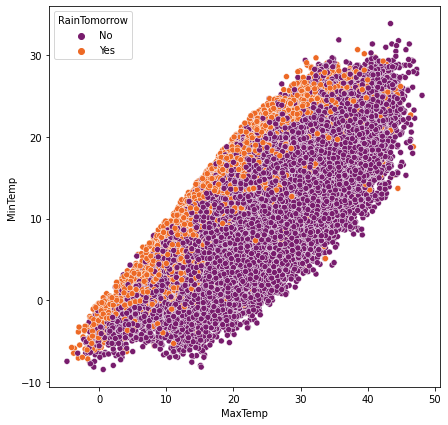

In [ ]:
plt.figure(figsize=(7,7))
sns.scatterplot(x='MaxTemp',y='MinTemp',hue='RainTomorrow',palette='inferno',data=df)

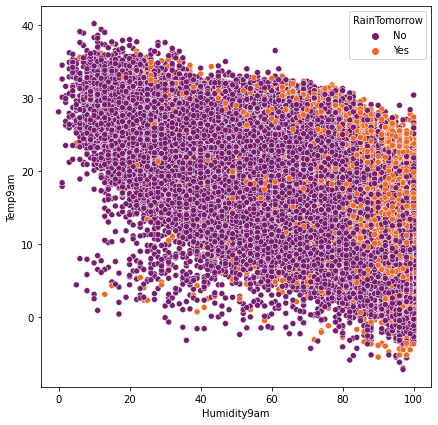

In [ ]:
plt.figure(figsize=(7,7))
sns.scatterplot(x='Humidity9am',y='Temp9am',hue='RainTomorrow',palette='inferno',data=df)

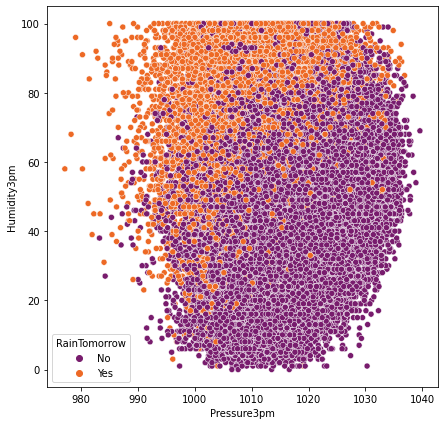

In [ ]:
plt.figure(figsize=(7,7))
sns.scatterplot(x='Pressure3pm',y='Humidity3pm',hue='RainTomorrow',palette='inferno',data=df)

In [ ]:
X_train_full

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
90012,21.5,31.7,0.0,4.8,8.4,31.0,7.0,15.0,57.0,65.0,...,0,0,0,0,0,0,0,0,0,0
100362,9.0,17.6,1.0,3.6,5.7,48.0,17.0,28.0,96.0,53.0,...,0,0,0,0,0,0,1,0,0,0
116943,6.0,18.8,1.6,4.8,5.0,50.0,20.0,33.0,93.0,70.0,...,0,0,0,0,0,0,0,0,0,1
59452,-0.6,11.6,0.0,4.8,8.4,28.0,0.0,13.0,95.0,64.0,...,0,0,0,0,0,0,0,0,0,0
65155,9.6,24.4,0.0,4.6,11.1,39.0,48.0,50.0,58.0,27.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41993,17.8,38.1,0.0,26.0,8.4,39.0,7.0,13.0,61.0,30.0,...,0,0,0,0,0,0,0,0,0,0
97639,12.5,27.3,0.0,4.8,10.0,30.0,0.0,13.0,60.0,32.0,...,0,0,0,0,0,0,0,0,1,0
95939,17.0,29.8,0.0,5.6,8.4,22.0,4.0,13.0,77.0,54.0,...,0,0,0,0,0,0,0,0,0,0
117952,11.9,22.0,3.8,6.2,7.7,35.0,19.0,24.0,55.0,49.0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
X_valid, X_train = X_train_full[:53322], X_train_full[53322:]
y_valid, y_train = y_train_full[:53322], y_train_full[53322:]

In [ ]:
from tensorflow.keras import regularizers
from keras import callbacks
np.random.seed(0)

model = keras.models.Sequential()
#units specify the output size from the dense layer
model.add(Dense(118, input_dim=118, activation='relu'))
model.add(Dense(118, input_dim=118, activation='relu'))
model.add(Dense(118, input_dim=118, activation='relu'))

model.add(Dense(59, input_dim=118, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

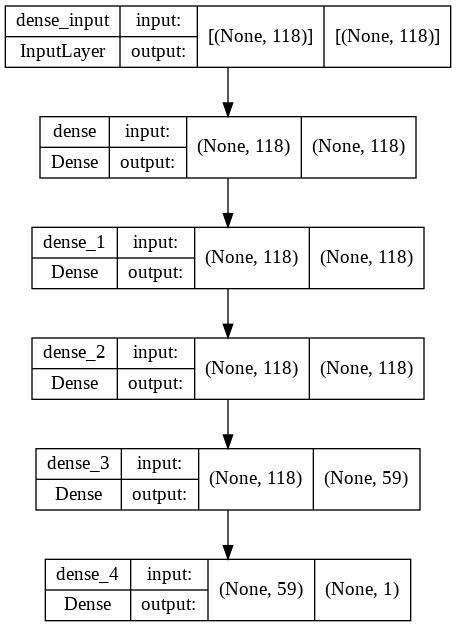

In [ ]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [ ]:
early_stopping_cb = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [ ]:
def last_time_step_bce(Y_true, Y_pred):
  return tf.keras.metrics.binary_crossentropy(y_true, y_pred)

In [ ]:
model.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [ ]:
train = model.fit(X_train, y_train, epochs=25, validation_data=(X_valid,y_valid),callbacks=[early_stopping_cb])

Epoch 1/25
1743/1743 [==============================] - 8s 4ms/step - loss: 0.5969 - accuracy: 0.8723 - val_loss: 0.1184 - val_accuracy: 0.9687
Epoch 2/25
1743/1743 [==============================] - 7s 4ms/step - loss: 0.1484 - accuracy: 0.9501 - val_loss: 0.0440 - val_accuracy: 0.9863
Epoch 3/25
1743/1743 [==============================] - 7s 4ms/step - loss: 0.1700 - accuracy: 0.9503 - val_loss: 0.0727 - val_accuracy: 0.9692
Epoch 4/25
1743/1743 [==============================] - 7s 4ms/step - loss: 0.1338 - accuracy: 0.9595 - val_loss: 0.0676 - val_accuracy: 0.9665
Epoch 5/25
1743/1743 [==============================] - 8s 4ms/step - loss: 0.1213 - accuracy: 0.9638 - val_loss: 0.0453 - val_accuracy: 0.9897
Epoch 6/25
1743/1743 [==============================] - 7s 4ms/step - loss: 0.0755 - accuracy: 0.9774 - val_loss: 0.0216 - val_accuracy: 0.9949
Epoch 7/25
1743/1743 [==============================] - 6s 4ms/step - loss: 0.0761 - accuracy: 0.9775 - val_loss: 0.7557 - val_accuracy:

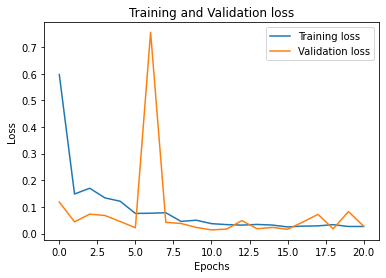

In [ ]:
history_df = pd.DataFrame(train.history)

plt.plot(history_df.loc[:, ['loss']], label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']], label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

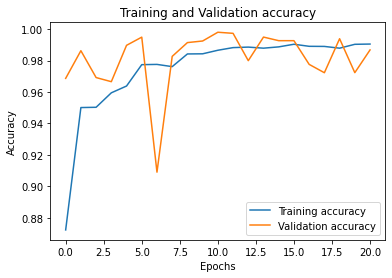

In [ ]:
history_df = pd.DataFrame(train.history)

plt.plot(history_df.loc[:, ['accuracy']], label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
model.evaluate(X_test,y_test)

1137/1137 [==============================] - 2s 1ms/step - loss: 0.0177 - accuracy: 0.9973


[0.017691178247332573, 0.9973325729370117]

In [ ]:
rounded = [round(x[0]) for x in y_pred]
y_pred = rounded

In [ ]:
cm_matrix = pd.DataFrame(data=confusion_matrix(y_test, y_pred), columns=['No Rain', 'Rain'], index=['No Rain', 'Rain'])
cm_matrix_coef = cm_matrix/cm_matrix.sum(axis=1)

In [ ]:
f1_score(y_test, y_pred)

0.9938611480286058

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.002667399972501031

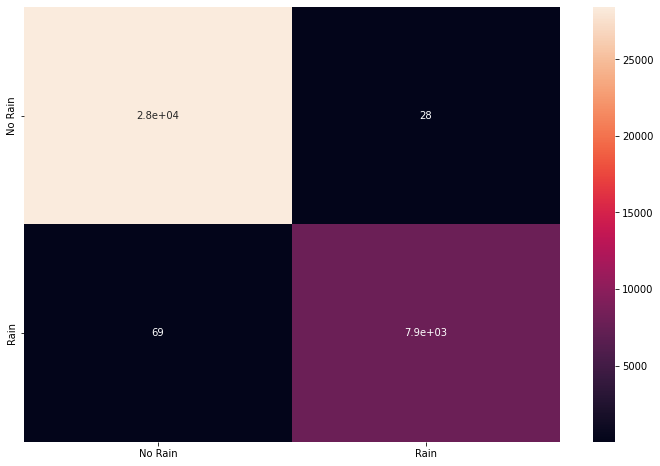

In [ ]:
import seaborn as sns

plt.subplots(figsize=(12,8))
sns.heatmap(cm_matrix, annot = True)

In [ ]:
cm_matrix

,No Rain,Rain
No Rain,28416,28
Rain,69,7852


In [ ]:
cm_matrix_coef.style.background_gradient(cmap="Blues")

,No Rain,Rain
No Rain,0.999016,0.003535
Rain,0.002426,0.991289


In [ ]:
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cvscores=[]
X,Y = model_1(df.copy())

for train, test in kfold.split(X, Y):
  training_data = X.iloc[train]
  training_validation_data = Y.iloc[train]

  test_data = X.iloc[test]
  test_validation_data = Y.iloc[test]

  model = keras.models.Sequential()
  #initially i used 118 for 3 layers and 59 and 1 for the next two layers in the units
  #
  #the values to testing are written to the side.
  #the testing values have an average accuracy of 82% when the dropout was added and without dropout it is 90%
  model.add(Dense(118, input_dim=118, activation='relu'))#118
  model.add(Dense(118, input_dim=118, activation='relu'))#59
  model.add(Dense(118, input_dim=118, activation='relu'))#32
  #model.add(Dropout(0.25))
  model.add(Dense(59, input_dim=118, activation='relu'))#8
 # model.add(Dropout(0.5))
  model.add(Dense(1, activation='sigmoid'))#1
  model.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])
  model.fit(X_train, y_train, epochs=25, validation_data=(X_valid,y_valid),callbacks=[early_stopping_cb])

  scores = model.evaluate(test_data,test_validation_data, verbose=0)
  cvscores.append(scores[1]*100)


Epoch 1/25
1743/1743 [==============================] - 7s 4ms/step - loss: 0.4580 - accuracy: 0.8636 - val_loss: 0.1722 - val_accuracy: 0.9480
Epoch 2/25
1743/1743 [==============================] - 6s 4ms/step - loss: 0.1581 - accuracy: 0.9443 - val_loss: 0.1031 - val_accuracy: 0.9525
Epoch 3/25
1743/1743 [==============================] - 6s 4ms/step - loss: 0.1009 - accuracy: 0.9669 - val_loss: 0.0574 - val_accuracy: 0.9804
Epoch 4/25
1743/1743 [==============================] - 7s 4ms/step - loss: 0.0642 - accuracy: 0.9782 - val_loss: 0.0299 - val_accuracy: 0.9875
Epoch 5/25
1743/1743 [==============================] - 7s 4ms/step - loss: 0.0466 - accuracy: 0.9827 - val_loss: 0.0297 - val_accuracy: 0.9857
Epoch 6/25
1743/1743 [==============================] - 7s 4ms/step - loss: 0.0823 - accuracy: 0.9740 - val_loss: 0.0313 - val_accuracy: 0.9856
Epoch 7/25
1743/1743 [==============================] - 7s 4ms/step - loss: 0.0543 - accuracy: 0.9827 - val_loss: 0.0165 - val_accuracy:

In [ ]:
i=1
for index in cvscores:
  print(f"Result of iteration {i} : %.2f%%" % (index))
  i+=1

Result of iteration 1 : 98.96%
Result of iteration 2 : 98.87%
Result of iteration 3 : 99.02%
Result of iteration 4 : 99.84%
Result of iteration 5 : 97.86%
Result of iteration 6 : 99.77%
Result of iteration 7 : 99.77%
Result of iteration 8 : 99.91%
Result of iteration 9 : 99.23%
Result of iteration 10 : 99.80%


In [ ]:
print("Cross Validation Score : %.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

Cross Validation Score : 99.30% (+/- 0.62%)
